In [41]:
from scipy.stats import multivariate_normal
import numpy as np 

mean = np.array([0, 1])
cov = np.array([[1, 0], [0, 1]])

x1 = np.array([0.2, 1.3])
x2 = np.array([2.2, -1.3])

p_x1 = multivariate_normal.pdf(x1, mean=mean, cov=cov)
p_x2 = multivariate_normal.pdf(x2, mean=mean, cov=cov)

print(f"At x1: {p_x1:.4f}, At x2: {p_x2:.4f}")

At x1: 0.1491, At x2: 0.0010


In [4]:
import matplotlib.pyplot as plt

In [14]:
rng = np.random.default_rng()

Text(0.5, 1.0, 'Dataset 8')

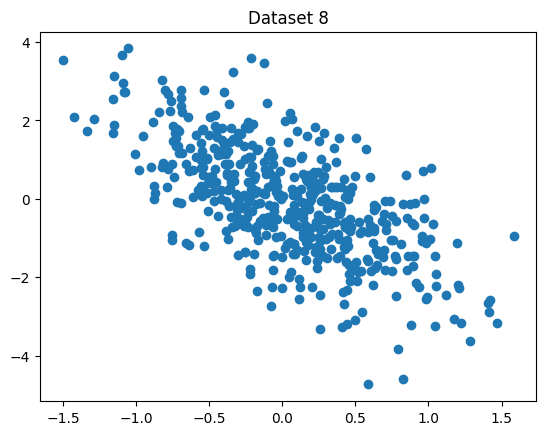

In [27]:
mean = ...
cov = ...

data = rng.multivariate_normal(mean, cov, 500)

plt.scatter(data[:, 0], data[:, 1])
plt.title("Dataset 8")

In [28]:
# Gaussian 1's mean
mean1 = [1, 1]

# Gaussian 2's mean
mean2 = [3, 3]

# Covariance matrix for both
cov = [[1, 0], [0, 1]]

# Class priors
p_omega1 = p_omega2 = 0.5

# Data point
x = [1.8, 1.8]

# Gaussian 1 PDF
p_x_omega1 = multivariate_normal.pdf(x, mean=mean1, cov=cov)

# Gaussian 2 PDF
p_x_omega2 = multivariate_normal.pdf(x, mean=mean2, cov=cov)

if p_x_omega1 > p_x_omega2:

    print("Class 1")

elif p_x_omega2 > p_x_omega1:

    print("Class 2")

Class 1


In [5]:
# 9
point = np.array([0.1, 0.5, 0.1])
mean1 = np.array([0.0, 0.0, 0.0])
mean2 = np.array([0.5, 0.5, 0.5])
cov = np.array([[0.8, 0.01, 0.01], 
               [0.01, 0.2, 0.01],
               [0.01, 0.01, 0.2]])

In [11]:
# 9
def euc_dist_classifier(point:np.ndarray, mean1:np.ndarray, mean2:np.ndarray) -> str:

    dist1 = np.linalg.norm(point - mean1)
    dist2 = np.linalg.norm(point - mean2)

    if dist1 <= dist2:
        return "Class 1"

    else:
        return "Class 2"
    
decision = euc_dist_classifier(point=point, mean1=mean1, mean2=mean2)
print(decision)

Class 1


In [10]:
def mah_dist_classifier(point: np.ndarray, mean1: np.ndarray, 
                        mean2: np.ndarray, cov: np.ndarray) -> str:
    
    inv_cov = np.linalg.inv(cov)
    
    point_mean1_dist = point - mean1
    mah_dist1 = np.sqrt(np.dot(np.dot(point_mean1_dist.T, inv_cov), point_mean1_dist))
    
    point_mean2_dist = point - mean2
    mah_dist2 = np.sqrt(np.dot(np.dot(point_mean2_dist.T, inv_cov), point_mean2_dist))
    
    if mah_dist1 <= mah_dist2:
        return "Class 1"
    else:
        return "Class 2"
    
decision = mah_dist_classifier(point=point, mean1=mean1, mean2=mean2, cov=cov)
print(decision)

Class 2


In [12]:
# 10

mean = np.array([2, -2])
cov = np.array([[0.9, 0.2], [0.2, 0.3]])

np.random.seed(21)
data = np.random.multivariate_normal(mean, cov, 50)

mean_ml = np.sum(data, axis=0) / data.shape[0]

data_centered = data - mean_ml
cov_ml = np.dot(data_centered.T, data_centered) / data.shape[0]

print("ML estimate of mean: ", mean_ml)
print("ML estimate of covariance: ", cov_ml)

ML estimate of mean:  [ 1.95868971 -1.9132445 ]
ML estimate of covariance:  [[0.87303966 0.11092212]
 [0.11092212 0.33511757]]


In [42]:
# 11

np.random.seed(21)

# Class 1
mean1 = np.array([0.0, 0.0, 0.0])

# Class 2
mean2 = np.array([1, 2, 2])

# Class 3
mean3 = np.array([3, 3, 4])

# Covariance matrix
cov = np.array([[0.8, 0.0, 0.0], 
               [0.0, 0.8, 0.0],
               [0.0, 0.0, 0.8]])

n = 1000

X_train1 = np.random.multivariate_normal(mean1, cov, n//3)
X_train2 = np.random.multivariate_normal(mean2, cov, n//3)
X_train3 = np.random.multivariate_normal(mean3, cov, n//3)

X_train = np.vstack((X_train1, X_train2, X_train3))
y_train = np.array([1]*(n//3) + [2]*(n//3) + [3]*(n//3))

X_test_1 = np.random.multivariate_normal(mean1, cov, n//3)
X_test_2 = np.random.multivariate_normal(mean2, cov, n//3)
X_test_3 = np.random.multivariate_normal(mean3, cov, n//3)

X_test = np.vstack((X_test_1, X_test_2, X_test_3))
y_test = np.array([1]*(n//3) + [2]*(n//3) + [3]*(n//3))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 3)
(999,)
(999, 3)
(999,)


In [43]:
def initialize_parameters(X, K):
    n, d = X.shape
    
    # Initialize parameters randomly from the data points

    mu = X[np.random.choice(n, K, replace=False)]
    
    cov = np.array([np.cov(X, rowvar=False) for _ in range(K)])
    
    pi = np.random.dirichlet(np.ones(K), size=1)[0]
    
    return mu, cov, pi


def em_algorithm(X, K, max_iter=100, tol=1e-6):
    n, d = X.shape

    mu, cov, pi = initialize_parameters(X, K)
    
    log_likelihoods = []
    
    for iteration in range(max_iter):
        # E-step
        r = np.zeros((n, K))
        for k in range(K):
            r[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k])
        r = r / r.sum(axis=1, keepdims=True)
        
        # M-step
        N_k = r.sum(axis=0)
        pi = N_k / n
        mu = (r.T @ X) / N_k[:, np.newaxis]
        cov = np.zeros((K, d, d))
        for k in range(K):
            diff = X - mu[k]
            cov[k] = (r[:, k][:, np.newaxis] * diff).T @ diff / N_k[k]
        
        # Log-likelihood
        log_likelihood = np.sum(np.log(np.sum([pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k]) for k in range(K)], axis=0)))
        log_likelihoods.append(log_likelihood)
        
        # Check for convergence
        if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Converged in {iteration} iterations")
            break
    
    return mu, cov, pi

In [45]:
K = 3
mu, cov, pi = em_algorithm(X_train, K)

print("Estimated means:\n", mu)
print("Estimated covariance matrices:\n", cov)
print("Estimated mixing coefficients:\n", pi)

Converged in 93 iterations
Estimated means:
 [[2.97098512e+00 2.95896480e+00 4.08558557e+00]
 [1.01215164e+00 2.09964044e+00 2.06359056e+00]
 [2.10131506e-02 4.55704299e-02 1.40876366e-03]]
Estimated covariance matrices:
 [[[ 0.85144153 -0.00263375  0.00786226]
  [-0.00263375  0.73163562  0.0639588 ]
  [ 0.00786226  0.0639588   0.863186  ]]

 [[ 0.7961972  -0.00154956 -0.0792679 ]
  [-0.00154956  0.73385162 -0.03648097]
  [-0.0792679  -0.03648097  0.65410439]]

 [[ 0.79117037  0.0483176   0.06799605]
  [ 0.0483176   0.87648905  0.08484608]
  [ 0.06799605  0.08484608  0.80452596]]]
Estimated mixing coefficients:
 [0.34349008 0.29783016 0.35867976]


In [46]:
cov_avg = (cov[0] + cov[1] + cov[2]) / 3
cov_avg

array([[ 0.81293637,  0.01471143, -0.00113653],
       [ 0.01471143,  0.78065876,  0.0374413 ],
       [-0.00113653,  0.0374413 ,  0.77393878]])

In [47]:
from scipy.spatial.distance import cdist

In [48]:
# Euclidean distance classifier
def euclidean_classifier(X, means):
    distances = cdist(X, means, 'euclidean')
    return np.argmin(distances, axis=1) + 1

y_pred_euclidean = euclidean_classifier(X=X_test, means=mu)
error_prob_euclidean = np.mean(y_pred_euclidean != y_test)

print("Error probability:", error_prob_euclidean)


Error probability: 0.7127127127127127


In [49]:
# Mahalanobis distance classifier
def mahalanobis_classifier(X, means, cov_inv):
    distances = cdist(X, means, 'mahalanobis', VI=cov_inv)
    return np.argmin(distances, axis=1) + 1


cov_inv = np.linalg.inv(cov_avg)
y_pred_mahalanobis = mahalanobis_classifier(X=X_test, means=mu, cov_inv=cov_inv)
error_prob_mahalanobis = np.mean(y_pred_mahalanobis != y_test)

print("Error probability:", error_prob_mahalanobis)

Error probability: 0.7127127127127127


In [51]:
# Bayesian classifier
def bayesian_classifier(X, means, cov):
    probs = np.zeros((X.shape[0], K))
    for i, mean in enumerate(means):
        rv = multivariate_normal(mean, cov)
        probs[:, i] = rv.pdf(X)
    return np.argmax(probs, axis=1) + 1

y_pred_bayesian = bayesian_classifier(X=X_test, means=mu, cov=cov_avg)
error_prob_bayesian = np.mean(y_pred_bayesian != y_test)

print("Error probability:", error_prob_bayesian)

Error probability: 0.7127127127127127


In [52]:
# 12

n = 500
means = [np.array([1, 1]), np.array([3, 3]), np.array([2, 6])]
covariances = [0.1 * np.eye(2), 0.2 * np.eye(2), 0.3 * np.eye(2)]
priors = [0.4, 0.4, 0.2]

data = np.zeros((n, 2))
labels = np.zeros(n, dtype=int)
for i in range(n):
    k = np.random.choice(len(priors), p=priors)
    data[i] = np.random.multivariate_normal(means[k], covariances[k])
    labels[i] = k

In [53]:
# Initial conditions
initial_conditions = [
    (3, np.array([[0, 2], [5, 2], [5, 5]]), [0.1 * np.eye(2), 0.2 * np.eye(2), 0.3 * np.eye(2)], [1/3, 1/3, 1/3]),
    (3, np.array([[1.6, 1.4], [1.4, 1.6], [1.3, 1.5]]), [0.2 * np.eye(2), 0.4 * np.eye(2), 0.3 * np.eye(2)], [0.2, 0.4, 0.4]),
    (2, np.array([[1.6, 1.4], [1.4, 1.6]]), [0.2 * np.eye(2), 0.4 * np.eye(2)], [1/2, 1/2])
]

results = []
for (J, initial_means, initial_covariances, initial_priors) in initial_conditions:
    mu, cov, pi = em_algorithm(data, J)
    results.append((mu, cov, pi))
    print(f"Initial Means:\n{initial_means}")
    print(f"Estimated Means:\n{mu}")
    print(f"Estimated Covariances:\n{cov}")
    print(f"Estimated Priors:\n{pi}\n")

Converged in 22 iterations
Initial Means:
[[0 2]
 [5 2]
 [5 5]]
Estimated Means:
[[1.93572557 5.987967  ]
 [1.00635204 1.02769421]
 [2.98947138 3.08185182]]
Estimated Covariances:
[[[ 0.29018311 -0.01068378]
  [-0.01068378  0.2769965 ]]

 [[ 0.10352005  0.00074768]
  [ 0.00074768  0.08863473]]

 [[ 0.19289057 -0.00139572]
  [-0.00139572  0.16888002]]]
Estimated Priors:
[0.17206659 0.44399981 0.3839336 ]

Converged in 19 iterations
Initial Means:
[[1.6 1.4]
 [1.4 1.6]
 [1.3 1.5]]
Estimated Means:
[[1.93572527 5.98796756]
 [2.98947136 3.08185199]
 [1.00635204 1.02769421]]
Estimated Covariances:
[[[ 0.29018293 -0.01068327]
  [-0.01068327  0.27699561]]

 [[ 0.19289055 -0.00139574]
  [-0.00139574  0.16888021]]

 [[ 0.10352005  0.00074768]
  [ 0.00074768  0.08863473]]]
Estimated Priors:
[0.17206653 0.38393366 0.44399981]

Initial Means:
[[1.6 1.4]
 [1.4 1.6]]
Estimated Means:
[[2.49605323 4.52850111]
 [1.61071221 1.63346931]]
Estimated Covariances:
[[[ 0.54237311 -0.79334466]
  [-0.79334466 

In [2]:
# 13

import numpy as np
from hmmlearn import hmm

# HMM parameters
states = ["A", "B"]
observations = ["H", "T"]
n_states = len(states)
n_observations = len(observations)

# Initial state probabilities
start_prob = np.array([1.0, 0.0])

# Transition probabilities
transition_matrix = np.array([
    [0.4, 0.6],
    [0.4, 0.6]
])

# Emission probabilities
emission_matrix = np.array([
    [0.6, 0.4],  # Coin A: 0.6 heads, 0.4 tails
    [0.4, 0.6]   # Coin B: 0.4 heads, 0.6 tails
])

obs_map = {'H': 0, 'T': 1}
obs_sequence = np.array([obs_map[obs] for obs in ['H', 'H', 'T', 'H', 'T']])


model = hmm.MultinomialHMM(n_components=n_states, n_iter=100)

model.startprob_ = start_prob
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

obs_sequence = obs_sequence.reshape(-1, 1)

model.fit(obs_sequence)

# Log likelihood of the observed sequence
log_likelihood = model.score(obs_sequence)

print(f"Log likelihood of the observed sequence: {log_likelihood}")


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Log likelihood of the observed sequence: -8.326672684688674e-17
